<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

### 1.1 Random numbers from the Normal distribution

In [1]:
np.random.normal(loc = 5, scale = 2, size = 10)
# loc is mean, scale = s.d.

array([4.25185143, 6.54222815, 3.33427804, 6.80682568, 6.70260159,
       4.58796258, 6.14629652, 4.47411136, 5.93112107, 3.45404879])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

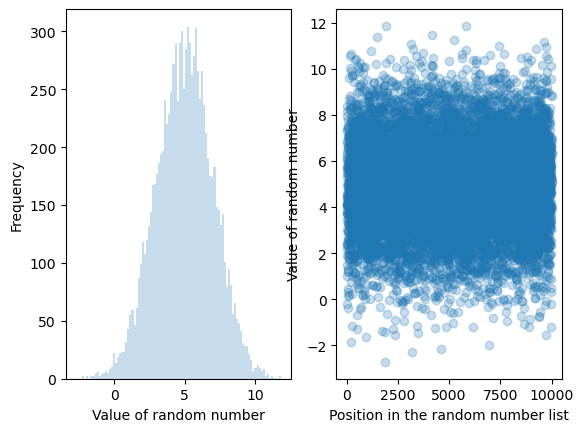

In [2]:
from matplotlib import pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc = 5, scale = 2, size = n)

fig, ax = plt.subplots(nrows = 1, ncols =2)
axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .25)
axis.set_xlabel('Value of random number')
axis.set_ylabel('Frequency')

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = .25)
axis.set_xlabel('Position in the random number list')
axis.set_ylabel('Value of random number')

### 1.3 68%?

In [38]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc = mean, scale = sd, size = n)
mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)
# Criteria that the random numbers must be between the first sd. 
# Didn't know that & can be used over and.

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 68.11%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [4]:
import numpy.random as rnd

def brown_1d(prob_right = .5, no_of_steps = 10000):
    step_size = 1
    x = 0
    for _ in range(no_of_steps):
        if rnd.random() < prob_right: # If generated RN is greater or below the probability.
            x += step_size # + means going right and vice versa. 
        else:
            x -= step_size
    return x

### 1.2 The simulation

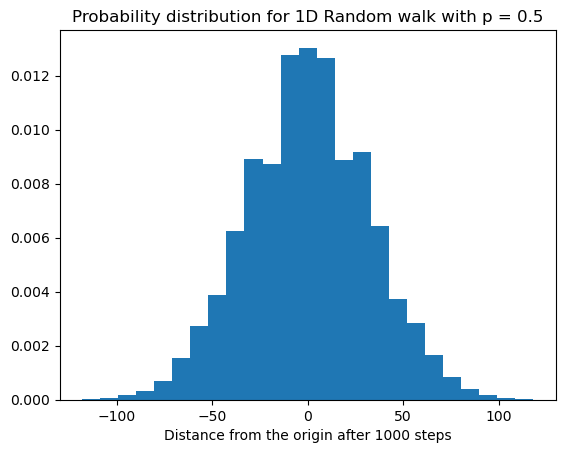

In [14]:
no_of_steps, p = 1000, .5
repeats = 10_000
results = [brown_1d(p, no_of_steps)
           for _ in range(repeats)]
plt.hist(results, bins = 25, density = True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p = {p}')
plt.show()

### 1.3 What does theory say?

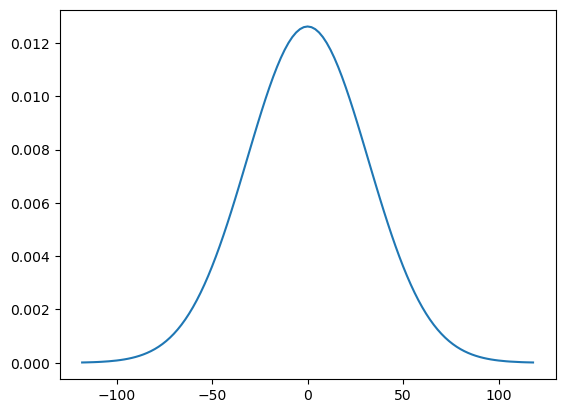

In [44]:
def normal(x, m = 0, s = 1):
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

prob_right = 0.5
prob_left = 1 - prob_right
mean = no_of_steps * (prob_right - prob_left)
sd = np.sqrt(4 * no_of_steps * prob_right * prob_left)
x = np.unique(results)

plt.plot(x, normal(x, mean, sd), label = 'Theoretical')
plt.show()

## 2 Estimating \$\pi$

### 2.1 The method

In [ ]:
# As ratio of green region and square is 1/4pi for circle of radius 1,
# pi can be estimated to be 4 * the ratio. 

### 2.2 A poor but intuitive solution

In [26]:
N_total = 100_000
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low = -1, high = 1, size = 1)
    y = rnd.uniform(low = -1, high = 1, size = 1)
    r = np.sqrt(x**2 + y**2)
    if r <= 1:
        N_green += 1

4 * N_green / N_total

# I can understand this. 

3.14244

### 2.3 A better solution

In [28]:
N_total = 1_000_000
x = rnd.uniform(low = -1, high = 1, size = N_total)
y = rnd.uniform(low = -1, high = 1, size = N_total)
N_green = np.sum((x**2 + y**2) <= 1)

4 * (N_green / N_total)

3.139388

### 2.4 A smarter solution

In [153]:
N_total = 1_000_000
x = rnd.rand(N_total)
y = rnd.rand(N_total)
N_green = np.sum((x**2 + y**2) <= 1)

# Is the reason why rnd.rand can be used instead of rnd.uniform
# because of the range being [0, 1) now?

4 * (N_green / N_total)

3.141108

## Exercise 1 :  Vital Stats of Random π

In [10]:
def estimate_pi(n):
    x, y = rnd.rand(n), rnd.rand(n)
    n_circle = np.sum(x**2 + y**2 <= 1)
    return 4 * n_circle / n

estimate_pi(1000000)

# Idk why when I repeat this code, pi estimate seems to be much 
# more variable with larger sd. 
# Ignore me, I am stupid

3.1408

In [11]:
pi_values = np.array([estimate_pi(1000000) for _ in range(100)])
mean = np.mean(pi_values)
sd = np.std(pi_values)

print(f'The mean and standard deviation are {mean:.5f} and {sd:.5f} respectively')

The mean and standard deviation are 3.14181 and 0.00158 respectively


In [160]:
points_used = np.array([10**1, 10**2, 10**3, 10**4, 10**5])
mean_pi, std_dev = np.array([]), np.array([])

for points in points_used:
    pi_values = np.array([estimate_pi(points) for _ in range(100)])
    mean_values = np.mean(pi_values)
    std = np.std(pi_values)
    mean_pi = np.append(mean_pi, mean_values)
    std_dev = np.append(std_dev, std)
print(mean_pi, std_dev) # To see the array of values.  

[3.088     3.1396    3.134     3.143604  3.1409144] [0.51561226 0.1634131  0.05634891 0.01828691 0.00457147]


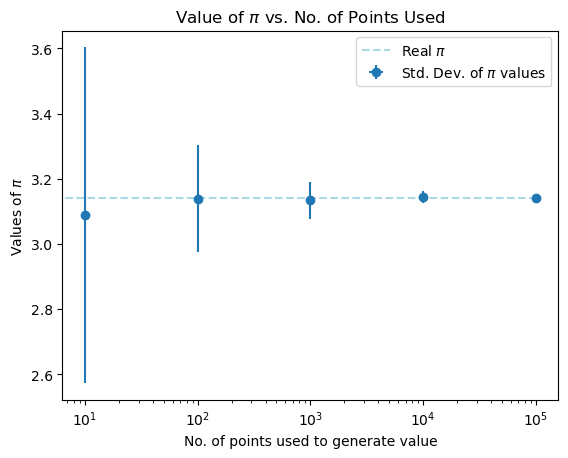

In [167]:
plt.xscale('log')
plt.hlines(np.pi, 0, points_used[-1], ls = '--',
          label = 'Real $\pi$', color = 'lightblue')
plt.errorbar(points_used, mean_pi, xerr = 0, yerr = std_dev, fmt = 'o',
            label = 'Std. Dev. of $\pi$ values')
plt.legend(loc = 'upper right')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Values of $\pi$')
plt.title('Value of $\pi$ vs. No. of Points Used')
plt.show()      